D

In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv('retail_sales_dataset.csv')  # Replace with actual file name

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values (if any)
df.dropna(inplace=True)


Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


Descriptive Statistics

In [ ]:
# Basic stats
print(df.describe(numeric_only=True))

# Mode
print("Mode:\n", df.mode().iloc[0])

# Median
print("Median:\n", df.median(numeric_only=True))

# Standard deviation
print("Standard Deviation:\n", df.std(numeric_only=True))


Time Series Analysis

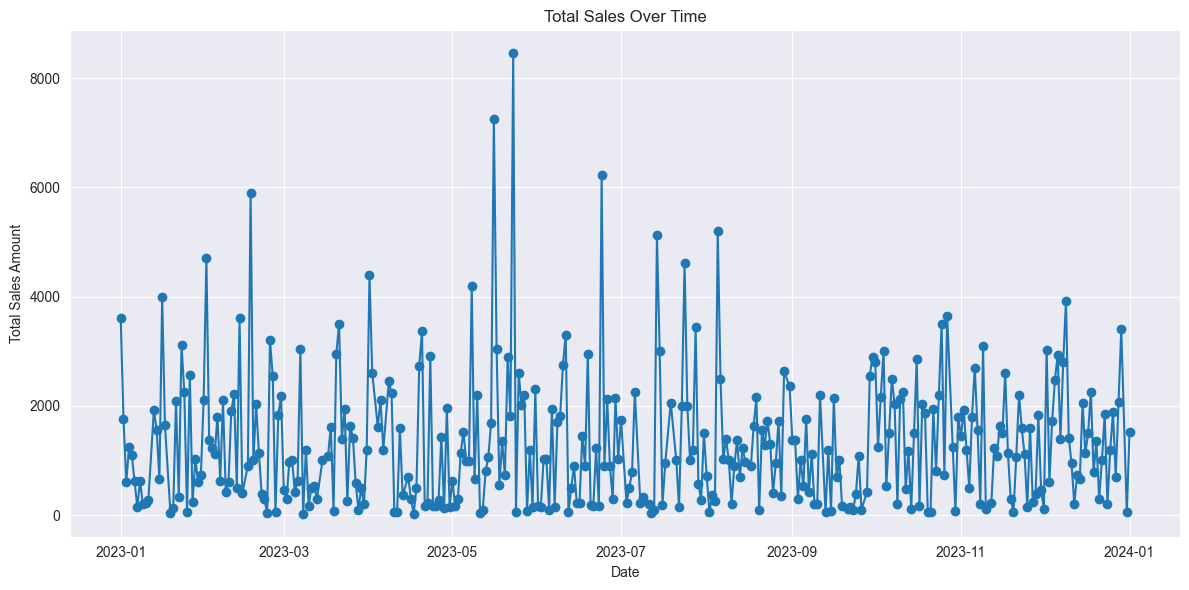

In [6]:
import matplotlib.pyplot as plt

# Group by Date and plot Total Amount
df_daily = df.groupby('Date')['Total Amount'].sum()

plt.figure(figsize=(12,6))
plt.plot(df_daily.index, df_daily.values, marker='o')
plt.title("Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales Amount")
plt.grid(True)
plt.tight_layout()
plt.show()


Customer and Product Analysis

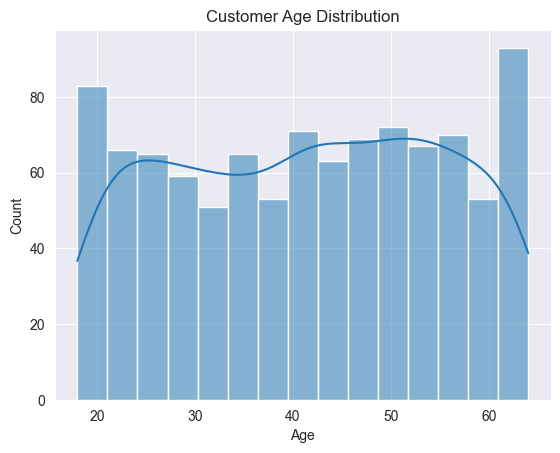

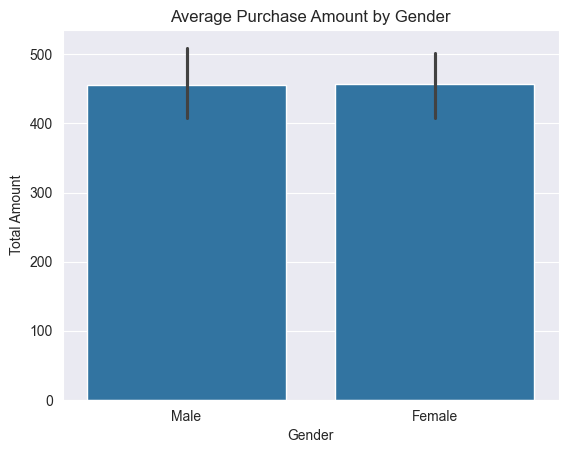

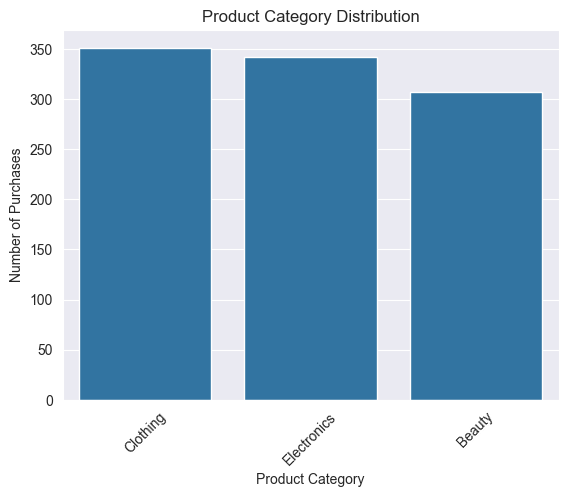

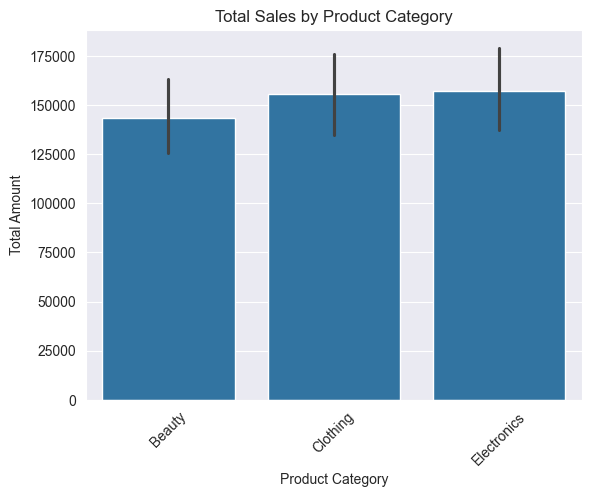

In [7]:
import seaborn as sns

# Age distribution
sns.histplot(df['Age'], bins=15, kde=True)
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Average Total Amount by Gender
sns.barplot(x='Gender', y='Total Amount', data=df, estimator='mean')
plt.title("Average Purchase Amount by Gender")
plt.show()

# Product Category Analysis
top_categories = df['Product Category'].value_counts()
sns.barplot(x=top_categories.index, y=top_categories.values)
plt.title("Product Category Distribution")
plt.ylabel("Number of Purchases")
plt.xticks(rotation=45)
plt.show()

# Total Amount by Product Category
sns.barplot(x='Product Category', y='Total Amount', data=df, estimator='sum')
plt.title("Total Sales by Product Category")
plt.xticks(rotation=45)
plt.show()


Corelation Heatmap

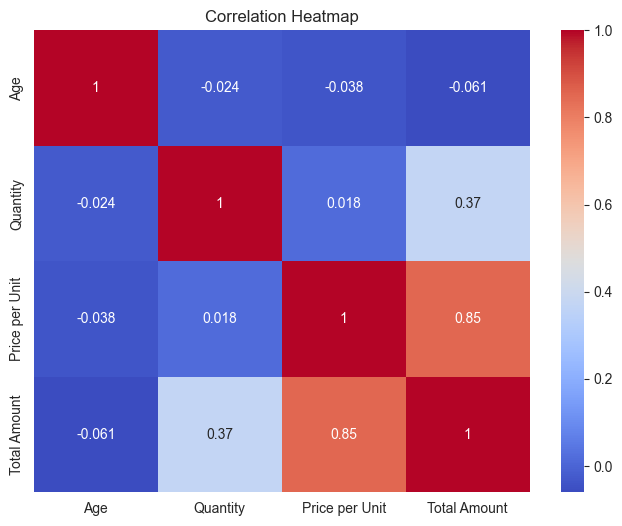

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
